### Clustering Stocks with Python
Often we are given data sets that contain ungrouped or uncategorized data; in these cases, we may want to find some underlying structure that might not be apparent to the naked eyes. When we want to group objects into similar sets, we are said to be clustering. The idea is relatively simple, objects that are more similar in nature should exist in the same group, and we use different measures of similarity to determine whether an object is similar to another. While clustering as a concept is easy to grasp, there are different implementations to achieve this. Some applications use different algorithms or use various measures to define similarity.

In this tutorial, we will do a clustering exercise where we will take a group of stocks and cluster them into different groups based on specific financial metrics. Clustering is used extensively in the financial industry to do a wide range of tasks, spanning from portfolio construction, outlier detection, or stock selection.

Often, portfolio managers devise strategies to select stocks that build risk-adjusted portfolios; these are portfolios that minimize risk for a given level of return. However, to do this, they must choose stocks that are not correlated with each other or in some cases to find stocks that are similar in nature to give them adequate exposure to a particular segment of the market.

Now, as mentioned above, there are many clustering algorithms we can use, but in this tutorial, we will use K-Means. K-Means is an unsupervised machine learning algorithm which is used on unlabeled data (i.e., data without defined categories or groups). The goal of the K-Means algorithm is to divide n data points into k partitions, where the sum of the distances is minimized.

### Broken into steps, the algorithm is executed in the following order:

1.Randomly select K-Centers, to be the cluster centers.

2.Calculate the distance of each point to a cluster, and assign a cluster label where the Euclidean distance is smallest.

3.Recompute the centroids by taking the mean of all the data points assigned to that cluster.

Repeat these steps until one of the following two conditions are met:
A.The Sum of the Distances is minimized.
B.The maximum number of iterations has been reached.

The algorithm will converge to a result, but this result is not necessarily guaranteed to be the optimal result. K-Means is used heavily for exploratory data analysis and for its ability to take unstructured data and create structure from it. This is powerful when it comes to finding patterns in data that aren't necessarily apparent to the naked eye, especially at higher dimensions.

In [1]:
import requests
import pandas as pd

In [2]:
# load the stock symbols into a data frame.
stock_symbols = pd.read_csv(r"C:/Users/HP/Desktop/Data Science/Data/stock_list.csv")

# we have a character that will cause issues in our request so we have to remove it
stock_symbols['Symbol'] = stock_symbols['Symbol'].str.replace('^','')

# display the number of rows.
display(stock_symbols.shape)

(5807, 1)

With over 5800, stocks, we need to break this data frame into chunks so that we can request multiple symbols at once. While TD Ameritrade's Search Instruments endpoint does allow for numerous stock requests at once, we will have errors take place if we exceed 100, so let's break the data frame into chunks of 100

In [3]:
# define the size of the chunk
n = 100

# for the sake of completeness

# this defines a chunk, for example if i = 1 and n = 100 we would select rows 1 to 101 stock_symbosl[1:101]
# stock_symbols[i:i+n]

# this defines the whole range of the data frame. Start at 0, go to the last row(stock_symbols.shape[0]), 
# and take a step of n in this case 100
# range( 0, stock_symbols.shape[0], n)

# break the data frame into chunks
symbols_chunk = [stock_symbols[i:i+n] for i in range( 0, stock_symbols.shape[0], n)]

In [4]:
# grab an example so you can see the output
example_chunk = list(symbols_chunk[0]['Symbol'])

# show the first five items
example_chunk[:5]

['A', 'AA', 'AABA', 'AAC', 'AAL']

### Step Two: Collect the Data
Alright, we have a list of symbols so let's move to the next part collecting the data for each stock symbol. For those of us who have a TD Ameritrade account, we are in luck because they have a free API we can use to collect all sorts of data on different financial instruments. This particular API was very popular among viewers, so if you would like to learn more about all the endpoints and how to get set up, I encourage you to watch my series on YouTube which can be found here:

https://www.youtube.com/playlist?list=PLcFcktZ0wnNnrgVvY_87ZRXRlac6Pciur

The general idea, is we will loop through each chunk in our list, make a request using the symbols in that list, convert it to a dictionary object, grab the fundamental data that was sent back, store it in our master dictionary, and then finally take our master dictionary and convert it into a pandas data frame

For the most part, the data is in a perfect format. However, we need to do one other transformation that involves transposing it. This will make selecting the columns of interest easier

In [5]:
# it's not in the right format, but if we transpose it we will have a much easier time grabbing the necessary columns.
stock_df = pd.read_csv("C:/Users/HP/Desktop/Data Science/Data/stock_data.csv")

# display the head to make sure it's right
display(stock_df.head())

# let's recheck the shape, we lost a few hundred but this was expected as TD Ameritrade doesn't have data on every stock.
display(stock_df.shape)

,beta,bookValuePerShare,currentRatio,divGrowthRate3Year,dividendAmount,dividendDate,dividendPayAmount,dividendPayDate,dividendYield,epsChange,...,revChangeYear,sharesOutstanding,shortIntDayToCover,shortIntToFloat,symbol,totalDebtToCapital,totalDebtToEquity,vol10DayAvg,vol1DayAvg,vol3MonthAvg
0,1.21802,2.79895,1.31538,0.0,3.080000,2019-05-10 00:00:00.0,0.770000,2019-08-16 00:00:00.0,1.57,0.0,...,0.0,4601.07500,0.0,0.0,AAPL,51.54927,106.3952,22963900.0,22963900.0,585636010.0
1,2.35784,0.00000,18.20330,0.0,0.000000,NaN,0.000000,NaN,0.00,0.0,...,0.0,63.78077,0.0,0.0,ADVM,0.00000,0.0000,625225.0,625220.0,13701860.0
2,0.85623,31.06079,3.46119,0.0,0.000000,NaN,0.000000,NaN,0.00,0.0,...,0.0,59.12744,0.0,0.0,AAXN,0.00000,0.0000,1287277.0,1287280.0,15188870.0
3,0.66686,0.00000,6.23734,0.0,0.000000,NaN,0.000000,NaN,0.00,0.0,...,0.0,50.06428,0.0,0.0,ACTG,0.00000,0.0000,104801.0,104800.0,2676700.0
4,0.94418,0.00000,0.00000,0.0,1.338665,2019-06-17 00:00:00.0,0.411154,2019-12-23 00:00:00.0,1.95,0.0,...,0.0,58.80000,0.0,0.0,AAXJ,0.00000,0.0000,736602.0,736600.0,29469660.0


(5222, 46)

### Step Three: Select the Attributes
We now have a master data frame that contains all the data on our stock. There are over 46 attributes we can choose from, or if we wanted, we could select them all. However, we will only be selecting three attributes in this tutorial. I want to make sure we understand certain concepts before we move on to higher dimensional data, and it’ll be easier to visualize these concepts with fewer attributes.

### With that being said, I did have the luxury of testing multiple combinations of attributes, and one set that gave promising results was Return on Equity, Return on Assets, and Return on Investment.

If you’re curious what these metrics are, I provided some definitions found on Investopedia.

1. Return on Assets: Return on assets (ROA) is an indicator of how profitable a company is relative to its total assets. ROA gives a manager, investor, or analyst an idea as to how efficient a company’s management is at using its assets to generate earnings. Return on assets is displayed as a percentage.

2. Return on Equity: Return on equity (ROE) is a measure of financial performance calculated by dividing net income by shareholders’ equity. Because shareholders’ equity is equal to a company’s assets minus its debt, ROE could be thought of as the return on net assets. ROE is considered a measure of how effectively management is using a company’s assets to create profits.

3.Return on Investments: Return on Investment (ROI) is a performance measure used to evaluate the efficiency of an investment or compare the efficiency of a number of different investments. ROI tries to directly measure the amount of return on a particular investment, relative to the investment’s cost. To calculate ROI, the benefit (or return) of an investment is divided by the cost of the investment. The result is expressed as a percentage or a ratio.

When I wanted to select attributes, I wanted to select attributes that gave a different perspective of the company, and could be standardized across different types of companies.

Also, make sure we choose the symbol column so we can use it as an index in our data frame. K-Means cannot handle missing data so it must be either removed from the data set or extra steps must be taken to fill in the missing values with either average values or estimates. To remove our missing data, we need to filter the data frame to remove any zeros, and then drop any na values by using the dropna method.

This was honestly a very interesting part of the tutorial, so much so that I explored some research papers that helped influence my selection of attributes. If you get a chance, I highly encourage you to read some of these papers and see their findings.

In [6]:
# define our indicators list
metrics_list = ['returnOnEquity','returnOnAssets','returnOnInvestment','symbol']

# select only those columns
indicators_df = stock_df[metrics_list]

# display the unedited DF
display(indicators_df.head())

# clustering can't handle missing values, so we need to eliminate any row that has a missing value.
indicators_df = indicators_df[indicators_df[metrics_list] != 0]
indicators_df = indicators_df.dropna(how='any')

display(indicators_df.head())

,returnOnEquity,returnOnAssets,returnOnInvestment,symbol
0,48.18294,15.8055,21.30287,AAPL
1,0.00000,0.0000,0.00000,ADVM
2,6.76543,4.0626,5.47783,AAXN
3,0.00000,0.0000,0.00000,ACTG
4,0.00000,0.0000,0.00000,AAXJ


,returnOnEquity,returnOnAssets,returnOnInvestment,symbol
0,48.18294,15.80550,21.30287,AAPL
2,6.76543,4.06260,5.47783,AAXN
5,45.43475,30.16776,36.04312,ADES
6,12.91672,3.53989,4.31677,ACCO
12,12.08748,4.19331,4.94682,AAWW


In [7]:
# set the index
indicators_df = indicators_df.set_index('symbol')

# do a data type conversion
indicators_df = indicators_df.astype('float')

indicators_df.head()

,returnOnEquity,returnOnAssets,returnOnInvestment
symbol,,,
AAPL,48.18294,15.80550,21.30287
AAXN,6.76543,4.06260,5.47783
ADES,45.43475,30.16776,36.04312
ACCO,12.91672,3.53989,4.31677
AAWW,12.08748,4.19331,4.94682


### Step Four: Remove Outliers
Now comes the exciting part, removing extreme values. The reality is that our data has many extreme values and this is expected given the variety of our companies. For example, our Return on Equity indicator has one company that has a value of 16000%! This value is not reflective of a traditional company, and more than likely is due to the fact of having a small equity base with large revenue denominator.

We need to remove these extreme values from our data set or else they will skew our results. However, that begs the question of what is a "reasonable value"? If we do a little exploring on the internet, we find that NYU Stern has provided an industry benchmark for a wide range of financial metrics. This will serve as our baseline for removing extreme values from the data sets.

If you're interested in seeing this benchmarks, please go to the following link:

http://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/pbvdata.html

http://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/pedata.html

Let's get an idea of just how many "extreme" values exist in our data set by filtering the different columns and performing a value_counts.

In [8]:
# define the filters
roe_filter = indicators_df.iloc[:,0] < 40
roa_filter = indicators_df.iloc[:,1] < 30
roi_filter = indicators_df.iloc[:,2] < 30

# get the counts for each column
roe_count = pd.Series(roe_filter).value_counts()
roa_count = pd.Series(roa_filter).value_counts()
roi_count = pd.Series(roi_filter).value_counts()

# display the results
display(roe_count)
display(roa_count)
display(roi_count)

True     1909
False     193
Name: returnOnEquity, dtype: int64

True     2058
False      44
Name: returnOnAssets, dtype: int64

True     2021
False      81
Name: returnOnInvestment, dtype: int64

In [9]:
# filter the entire data frame -  As K-means are very sensitive to outliers
indicators_df = indicators_df[roe_filter & roa_filter & roi_filter]

# display the results
indicators_df.head()

,returnOnEquity,returnOnAssets,returnOnInvestment
symbol,,,
AAXN,6.76543,4.06260,5.47783
ACCO,12.91672,3.53989,4.31677
AAWW,12.08748,4.19331,4.94682
ADUS,7.51694,5.33343,6.52183
AB,15.52055,15.50523,15.50523


Okay, after removing some of these extreme values, we are now at an excellent spot to do a statistical summary of our data set. Use the describe method to create a summary data frame and then add a standard deviation metric that is calculated using the mean.

In [10]:
# create a statistical summary
desc_df = indicators_df.describe()

# add the standard deviation metric
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)

# display it
desc_df

,returnOnEquity,returnOnAssets,returnOnInvestment
count,1886.000000,1886.000000,1886.000000
mean,12.588871,5.964759,7.578311
std,8.701498,4.582212,5.824265
min,0.044180,0.036950,0.041490
25%,5.750330,2.577992,3.136615
50%,11.045815,4.765765,6.151425
75%,17.580588,8.168385,10.504722
max,39.538890,26.093900,29.889750
+3_std,38.693367,19.711394,25.051107
-3_std,-13.515624,-7.781876,-9.894485


### Step Five: Visualize & Scale the Data

For the most part, the data is in a good range, there are a few values that are outside three standard deviations, but it's expected given the variety of stocks we have. Also, we will take steps later to mitigate this. Now that we've done a statistical summary, we can move on to plotting. In this example, let's use a 3D scatter plot to see all the data points. I will be using matplotlib to create our chart.

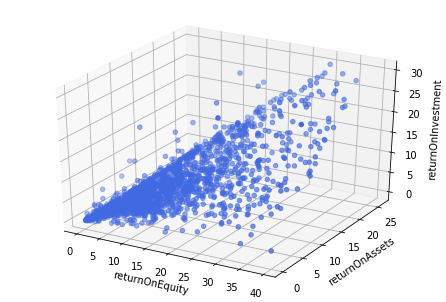

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# define a figure and a 3D axis
fig = plt.figure()
ax = Axes3D(fig)

# define the x, y, & z of our scatter plot, this will just be the data from our data frame.
x = list(indicators_df.iloc[:,0])
y = list(indicators_df.iloc[:,1])
z = list(indicators_df.iloc[:,2])

# define the axis labels
column_names = indicators_df.columns
ax.set_xlabel(column_names[0])
ax.set_ylabel(column_names[1])
ax.set_zlabel(column_names[2])

# define the markers, and the color
ax.scatter(x, y, z, c='royalBlue', marker='o')

plt.show()

As mentioned above, I purposely limited the number of attributes in our data set. The reason being that it's hard to visualize data that exceeds three dimensions. However, looking at this data it does seem to be clumped together with no definite spherical shape, this can cause issues when clustering because naturally, the algorithm looks for the precise structure to cluster the data around. There are steps we can take to help mitigate this issue, but this also a reality of data, there might not be clear clusters, and in some cases, clustering might not be the right approach.

Let's continue and begin normalizing our data, to help handle outliers and things of that nature. You should almost always normalize your data as the model tends to perform better with normalized data vice the alternative. We have a few options to normalize our data:

### 1.Standard Scaler:
Here we subtract the mean from each data point and divide it by the standard deviation. This method is sensitive to outliers; however, like computing, the mean means taking the average of ALL data points, including the outliers.

### 2.Min Max Scaler:
Here we scale the data so that it fits in a range between 0 and 1. Mathematically we take each data point, subtract the minimum from it, and then divide it by the difference of the maximum value and the minimum value. Again, this is sensitive to outliers as the maximum amount would be the outlier.

### 3. Robust Scaler: 
This method is a better choice if your data has outliers. With this method, we use the interquartile range instead of the minimum and maximum, which helps control for outliers.

In our example, because there might be a possibility for outliers, I recommend we use the Robust Scaling method.

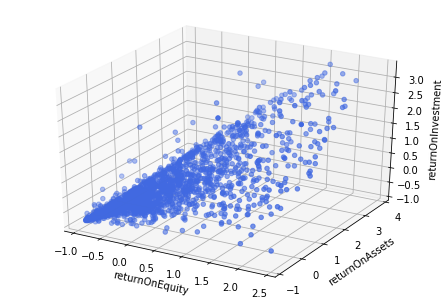

In [12]:
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# for demonstration purposes, I will be creating all three instances of the scalers.
min_max_scaler = MinMaxScaler()
std_scaler = StandardScaler()
robust_scaler = RobustScaler()

# scale the data
X_train_minmax = min_max_scaler.fit_transform(indicators_df)
X_train_standard = std_scaler.fit_transform(indicators_df)
X_train_robust = robust_scaler.fit_transform(indicators_df)

# create a new plot
fig = plt.figure()
ax = Axes3D(fig)

# take the scaled data in this example.
x = X_train_robust[:,0]
y = X_train_robust[:,1]
z = X_train_robust[:,2]

# define the axes labels
column_names = indicators_df.columns
ax.set_xlabel(column_names[0])
ax.set_ylabel(column_names[1])
ax.set_zlabel(column_names[2])

# create a new plot
ax.scatter(x, y, z, c='royalBlue')

plt.show()

### Step Six (Optional): Principal Component Analysis

By scaling the data, we are allowing our algorithm to perform better with the data. Another topic we will discuss is the idea of Principal Component Analysis, which, with large data sets with multiple attributes, will allow our model to run faster and have less redundant data.

To help conceptualize this concept, imagine I described a particular famous dog to you.

Clifford is a big red dog with a friendly smile.

Now imagine, I added more detail to the story to help describe Clifford.

Clifford is a big fire-red dog with a friendly smile.

For the most part, many people would say that adding the extra detail didn't provide much more to the story. I bet I could've left it out entirely and you still would've got the gist of the story. With PCA, we try to determine this additional info and remove it from the story. Yes, we might remove attributes from our data set, but it's to our benefit in most cases.

The idea is that even though I might lose 3% of all information I still can describe 97% of the story and in most cases, this is more than enough to get the general theme of the story. We also gain the benefit of faster execution time when it comes to training our model. In a clustering algorithm like K-Means, while it is easy to understand and implement, it does suffer from long training runs when there are too many attributes.

PCA attempts to remedy this problem by removing the attributes that don't contribute too much to story and keep those attributes which contribute significantly to the story. Implementing PCA in sklearn is easy to do, but something we need to do as an initial step is to get an understanding of the number of components we need.

Visually this can be done by passing through our scaled data set into our PCA class object, and plotting the explained_variance_ratio which will tell us how much of the variance is explained at any given number of components.

Let's implement this!

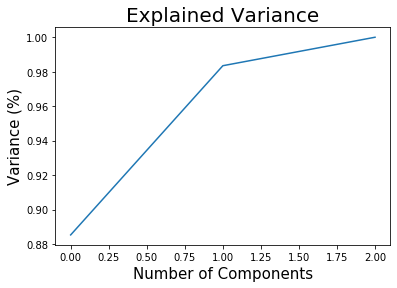

In [13]:
from sklearn.decomposition import PCA

# pass through the scaled data set into our PCA class object
pca = PCA().fit(X_train_robust)

# plot the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# define the labels & title
plt.xlabel('Number of Components', fontsize = 15)
plt.ylabel('Variance (%)', fontsize = 15) 
plt.title('Explained Variance', fontsize = 20)

# show the plot
plt.show()
# Basically what its showing is with 1 component your 98% variance is explained and with 2 components 100% variance is explained

From the chart above, we can see that we have 100% of variance explained with only two components. This means that if we were to implement a PCA, we would select our number of components to be 2. In most examples, we won't get 100% explained the variance, but the general rule is to choose the minimum number of components that demonstrates the highest amount of variance.

### I will only be using PCA for demonstration purposes, in a case with such few attributes as our example PCA is not justified or recommended.

In [14]:
# create a PCA modified dataset
pca_dataset = PCA(n_components=2).fit(X_train_robust).transform(X_train_robust)

# store it in a new data frame
pca_dataset= pd.DataFrame(data = pca_dataset, columns = ['principal component 1', 'principal component 2'])

By running PCA, we have reduced the number of dimensions in our data set from 3 to 2; this means if we graph our new data frame, we will only have two dimensions. Let's see how the new data set would look graphically.

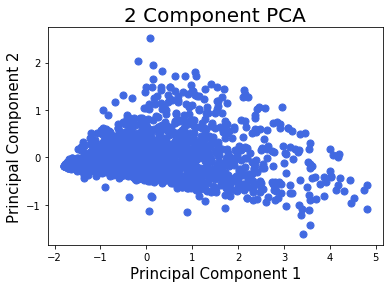

In [15]:
# define a figure
plt.figure()

# define the label and title
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('2 Component PCA', fontsize = 20)

# plot the figure
plt.scatter(pca_dataset['principal component 1'], pca_dataset['principal component 2'], c='royalBlue', s = 50)

### Step Seven: Build & Run the Model

One of the biggest challenges with K-Means is determining the optimum number of clusters, so I decided to explore some options we have. One type of analysis we can do is related to silhouette analysis, and while I would like to describe it myself, I think the official sklearn documentation does a beautiful job of summarizing it.

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like the number of clusters visually. This measure has a range of (-1, 1).

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

If you would like a more detailed explanation, feel free to explore the documentation yourself.
*https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html*

We will create an instance of our KMeans model, and explore how the silhouette score changes within a limited range of clusters. From here, we will take the maximum score to determine our cluster.

In [16]:
from sklearn.cluster import KMeans
from sklearn import metrics

# define a dictionary that contains all of our relevant info.
results_dict = {}

# define how many clusters we want to test up to.
num_of_clusters = 10

# run through each instance of K
for k in range(2, num_of_clusters):
    
    print("-"*100)
    
    # define the next dictionary to hold all the results of this run.
    results_dict[k] = {}

    # create an instance of the model, and fit the training data to it.
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_train_robust)
    
    # define the silhouette score
    sil_score = metrics.silhouette_score(X_train_robust, kmeans.labels_, metric='euclidean')
    
    # store the different metrics
    results_dict[k]['silhouette_score'] = sil_score
    results_dict[k]['inertia'] = kmeans.inertia_
    results_dict[k]['score'] = kmeans.score
    results_dict[k]['model'] = kmeans
    
    # print the results    
    print("Number of Clusters: {}".format(k))
    print('Silhouette Score:', sil_score)

----------------------------------------------------------------------------------------------------
Number of Clusters: 2
Silhouette Score: 0.5409025131522358
----------------------------------------------------------------------------------------------------
Number of Clusters: 3
Silhouette Score: 0.4715762202588651
----------------------------------------------------------------------------------------------------
Number of Clusters: 4
Silhouette Score: 0.405826839850127
----------------------------------------------------------------------------------------------------
Number of Clusters: 5
Silhouette Score: 0.41754425725255817
----------------------------------------------------------------------------------------------------
Number of Clusters: 6
Silhouette Score: 0.3950102131040407
----------------------------------------------------------------------------------------------------
Number of Clusters: 7
Silhouette Score: 0.36055037662941375
---------------------------------------

Okay, so we ran our cluster analysis now what? Well, the first thing we should look at is the overall silhouette score, ideally the larger the number, the better the results. However, this score is just part of the story, and we will have to examine the results to give ourselves a sanity check visually, but at this point, we can use the silhouette score as a gage of which ones we should target first.

Looking at the results above, 2 or 3 should be our target.

Let's also run the results on our PCA data set to see what the output would look like. In this case, we get a higher silhouette score, which is a good sign, and it points to the same outcome, explore a cluster of 2 or 3.

In [17]:
# We are just doing the same with our pcs_datset
# define a dictionary that contains all of our relevant info.
results_dict_pca = {}

# define how many clusters we want to test up to.
num_of_clusters = 10

# run through each instance of K
for k in range(2, num_of_clusters):
    
    print("-"*100)
    
    # define the next dictionary to hold all the results of this run.
    results_dict_pca[k] = {}

    # create an instance of the model, and fit the training data to it.
    kmeans = KMeans(n_clusters=k, random_state=0).fit(pca_dataset)
    
    # define the silhouette score
    sil_score = metrics.silhouette_score(pca_dataset, kmeans.labels_, metric='euclidean')
    
    # store the different metrics
    results_dict_pca[k]['silhouette_score'] = sil_score
    results_dict_pca[k]['inertia'] = kmeans.inertia_
    results_dict_pca[k]['score'] = kmeans.score
    results_dict_pca[k]['model'] = kmeans
    
    # print the results    
    print("Number of Clusters: {}".format(k))
    print('Silhouette Score:', sil_score)

----------------------------------------------------------------------------------------------------
Number of Clusters: 2
Silhouette Score: 0.5491540143144819
----------------------------------------------------------------------------------------------------
Number of Clusters: 3
Silhouette Score: 0.4844668530469672
----------------------------------------------------------------------------------------------------
Number of Clusters: 4
Silhouette Score: 0.4217369632444951
----------------------------------------------------------------------------------------------------
Number of Clusters: 5
Silhouette Score: 0.4337438923344191
----------------------------------------------------------------------------------------------------
Number of Clusters: 6
Silhouette Score: 0.4165917078894547
----------------------------------------------------------------------------------------------------
Number of Clusters: 7
Silhouette Score: 0.39335274969824124
---------------------------------------

### Step Eight: Model Evaluation

With the help of a graphical aid, we can also analyze the results of our clusters. If we use the yellowbrick library, we get to access the SilhouetterVisualizer which will help visualize the silhouette score for each point in that particular cluster. What we are looking for is that each cluster exceeds the red line or the average silhouette score and that the clusters are as evenly distributed as possible.

You may be wondering why some of these values are below 0, and some are above, with the negative values these are data points that visually fall at the edge of two clusters. In other words, it's hard to determine where they fall; they are outliers that are tricky to group.

The high positive values are data points that would almost be in the center of the cluster and very easy to classify. I've provided a visual aid to help drive home the concept.

In [20]:
!pip install yellowbrick

----------------------------------------------------------------------------------------------------


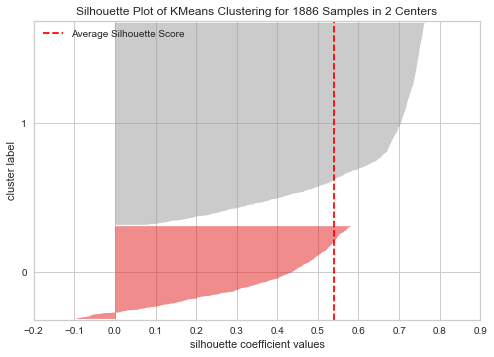

----------------------------------------------------------------------------------------------------


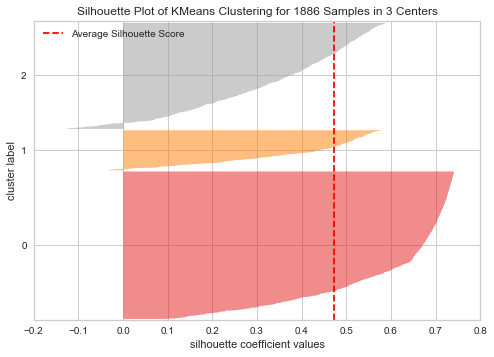

In [23]:
from yellowbrick.cluster import SilhouetteVisualizer

clusters = [2,3]

for cluster in clusters:
    
    print('-'*100)

    # define the model for K
    kmeans = KMeans(n_clusters = cluster, random_state=0)

    # pass the model through the visualizer
    visualizer = SilhouetteVisualizer(kmeans)

    # fit the data
    visualizer.fit(X_train_robust)

    # show the chart
    visualizer.poof()
    # We are checking whether to opt for 2 , 3 clusters 
    # Ideally we want our data to be above the red line -(Avg. Silhoutte score)
    # and should have good width between them
    # we still go with 3 clusters
    # in the first graph it shows majority data still in one cluster

----------------------------------------------------------------------------------------------------


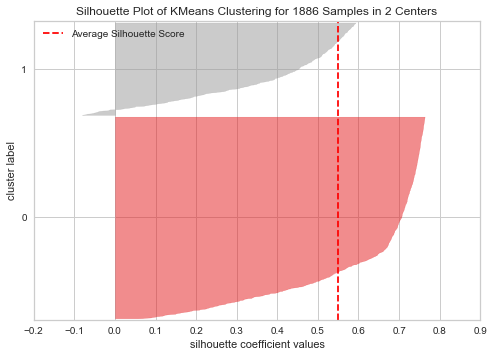

----------------------------------------------------------------------------------------------------


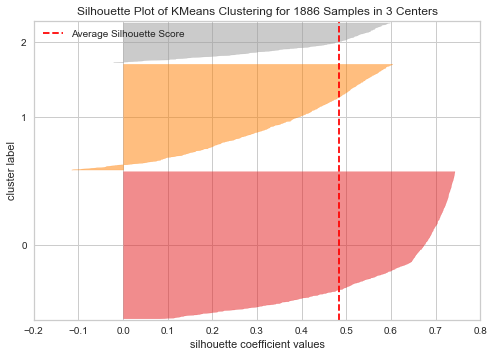

In [22]:
# Same thing with our pca_datset
clusters = [2,3]

for cluster in clusters:

    print('-'*100)

    # define the model for K
    kmeans = KMeans(n_clusters = cluster, random_state=0)

    # pass the model through the visualizer
    visualizer = SilhouetteVisualizer(kmeans)

    # fit the data
    visualizer.fit(pca_dataset)

    # show the chart
    visualizer.poof()

### Step Nine: Chart the Clusters
Let's get to the fun part, visualizing our clusters! This will involve, in the non-PCA case, creating another 3D scatter plot, but in this instance, we will define the c parameter of our scatter to equal our model labels. This will correctly create the clusters for us.

Again, we will do this in the case of 2 and 3 clusters so we can visually see the difference.

----------------------------------------------------------------------------------------------------


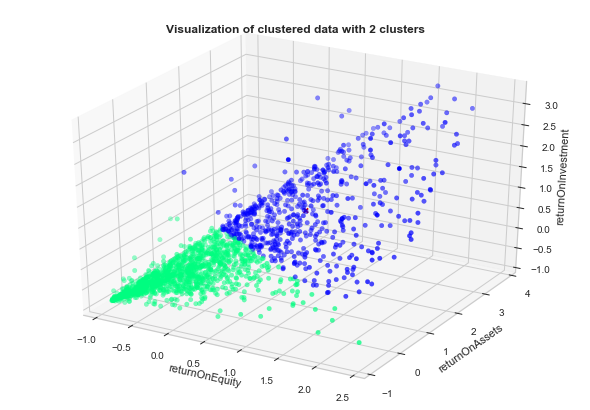

----------------------------------------------------------------------------------------------------


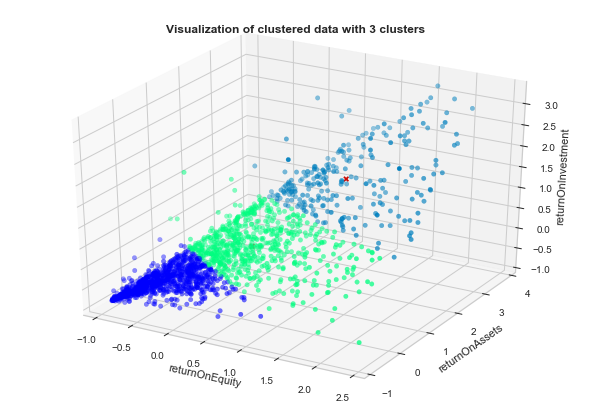

In [24]:
clusters = [2,3]

for cluster in clusters:
    
    print('-'*100)
    
    kmeans = KMeans(n_clusters= cluster, random_state=0).fit(X_train_robust)
    
    # define the cluster centers
    cluster_centers = kmeans.cluster_centers_
    C1 = cluster_centers[:, 0]        #Defining the 3 centres based on the 3 different colums
    C2 = cluster_centers[:, 1]
    C3 = cluster_centers[:, 2]


    # create a new plot
    fig = plt.figure()
    ax = Axes3D(fig)

    # take the scaled data in this example.
    x = X_train_robust[:,0]
    y = X_train_robust[:,1]
    z = X_train_robust[:,2]

    # define the axes labels
    column_names = indicators_df.columns
    ax.set_xlabel(column_names[0])
    ax.set_ylabel(column_names[1])
    ax.set_zlabel(column_names[2])

    # create a new plot
    ax.scatter(x, y, z, c = kmeans.labels_.astype(float), cmap='winter')
    ax.scatter(C1, C2, C3, marker="x", color='r') # centroid based on the above c1 , c2 , c3 

    plt.title('Visualization of clustered data with {} clusters'.format(cluster), fontweight='bold')

    plt.show()

How should we interpret these results? Personally, when I saw the three cluster one, it made sense. We have some companies who perform horribly across all three metrics, that would be the dark blue region in the lower left-hand corner. We then have our average company, denoted by the color green; these are companies who might beat on some metrics, lose on some, or do average. Finally, we have our "show stoppers" these are companies denoted in light blue and represent the companies who are crushing every metric.

Again, there might be different ways to interpret these results, but for me it visually made sense, and while they might not have a nice spherical structure there is some type of grouping there albeit weak in some instances.

----------------------------------------------------------------------------------------------------


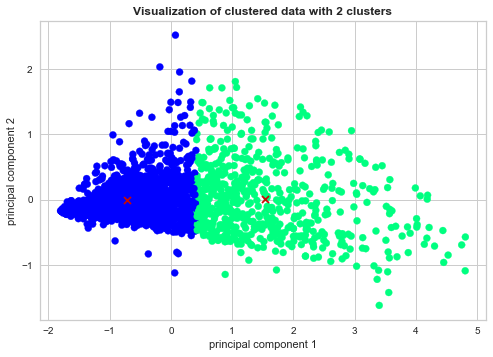

----------------------------------------------------------------------------------------------------


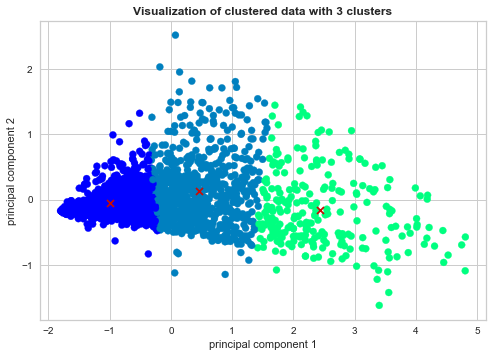

In [25]:
clusters = [2,3]

for cluster in clusters:
    
    print('-'*100)
    
    kmeans = KMeans(n_clusters= cluster, random_state=0).fit(pca_dataset)
    
    # define the cluster centers
    cluster_centers = kmeans.cluster_centers_
    C1 = cluster_centers[:, 0]
    C2 = cluster_centers[:, 1]

    # create a new plot
    plt.figure()

    # take the scaled data in this example.
    x = pca_dataset['principal component 1']
    y = pca_dataset['principal component 2']


    # define the axes labels
    column_names = pca_dataset.columns
    plt.xlabel(column_names[0])
    plt.ylabel(column_names[1])

    # Visualize it:
    plt.scatter(x, y, c=kmeans.labels_.astype(float), cmap='winter')
    plt.scatter(C1, C2, marker="x", color='r')

    # Plot the clustered data
    plt.title('Visualization of clustered data with {} clusters'.format(cluster), fontweight='bold')
    plt.show()

### Step Ten: Make Predictions
Okay, we've settled on three clusters being our number of choice let's make some predictions.

In [26]:
# grab the model
kmeans = results_dict[3]['model']

# define some test data
test_data = [[0.10, 3.10, 5.20],
             [0.60, 5.10, 2.20]]

# make some predictions, in this case let's pass through our test set.
kmeans.predict(test_data)

array([1, 1])

### Final Notes:
Overall, I was happy with the results, but this is not to say there couldn't be extra steps we could take to improve the results. This final part of the tutorial is taking a step back and looking at some things we might want to address or explore deeper.

### The Clusters Appear Very Dense
This could impact the K-Means algorithm, and while it might not provide perfect results they could be suboptimal. Because of this, I would like to explore more density-based clustering algorithms and see how that impacts our results.

### Exploring How Filtering Affects the Results
While I did my best to apply filters that seemed reasonable, I would be curious to see how our results change as we change the filter for outliers.